In [963]:
import sys
sys.path.append('/Users/celiaberon/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/celiaberon/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as scio
import bandit_preprocessing as bp
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [966]:
record = pd.read_csv('/Users/celiaberon/GitHub/mouse_bandit/session_record.csv',index_col=0)
ca_data = scio.loadmat('/Volumes/Neurobio/MICROSCOPE/Celia/data/k7_03142017_test/neuron_results.mat',squeeze_me = True, struct_as_record = False)
neuron = ca_data['neuron_results'] 

In [967]:
record.shape

(801, 16)

In [968]:
record.head(5)

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
0,11012016_K1,K1,2016-11-01 00:00:00,1.0,1.0,1.0,1000.0,1000.0,8.0,0.0,8.0,0.00,10.0,0.5,35.0,35.0
1,11022016_K1,K1,2016-11-02 00:00:00,1.0,1.0,1.0,1000.0,1000.0,85.0,0.0,85.0,0.00,10.0,0.5,35.0,35.0
2,11032016_K1,K1,2016-11-03 00:00:00,1.0,1.0,1.0,1000.0,1000.0,104.0,0.0,104.0,0.00,3.0,1.0,35.0,35.0
3,11042016_K1,K1,2016-11-04 00:00:00,2.0,0.1,0.9,50.0,50.0,70.0,1.0,50.0,0.83,2.0,1.0,35.0,35.0
4,11082016_K1,K1,2016-11-08 00:00:00,1.0,1.0,1.0,500.0,500.0,118.0,0.0,118.0,0.00,5.0,1.0,60.0,60.0


In [969]:
session_name  = '03142017_K7'
mouse_id = 'K7'

record[record['Session ID'] == session_name]

,Session ID,Mouse ID,Date,Phase,Left Reward Prob,Right Reward Prob,Block Range Min,Block Range Max,No. Trials,No. Blocks,No. Rewards,p(high Port),Decision Window Duration,Min Inter-trial-interval,Left Solenoid Duration,Right Solenoid Duration
676,03142017_K7,K7,2017-03-14 00:00:00,2.0,0.8,0.2,50.0,50.0,519.0,7.0,378.0,0.89,2.0,1.0,35.0,35.0


# Extract data from specific session

In [970]:
'''
load in trial data
'''
columns = ['Elapsed Time (s)','Since last trial (s)','Trial Duration (s)','Port Poked',
           'Right Reward Prob','Left Reward Prob','Reward Given',
          'center_frame','decision_frame']

root_dir = '/Users/celiaberon/GitHub/mouse_bandit/data/trial_data'

full_name = session_name + '_trials.csv'

path_name = os.path.join(root_dir,full_name)

trial_df = pd.read_csv(path_name,names=columns)

In [47]:
trial_df.head(11)

,Elapsed Time (s),Since last trial (s),Trial Duration (s),Port Poked,Right Reward Prob,Left Reward Prob,Reward Given,center_frame,decision_frame
0,13.361,1.547,0.384,2,0.8,0.2,1,636,647
1,15.477,1.719,0.397,2,0.8,0.2,0,699,711
2,39.428,23.441,0.510,2,0.8,0.2,0,1414,1429
3,48.378,1.807,0.418,2,0.8,0.2,0,1685,1697
4,55.984,7.032,0.574,2,0.8,0.2,0,1908,1926
5,57.603,1.117,0.502,2,0.8,0.2,0,1959,1974
6,67.366,1.858,0.366,2,0.8,0.2,0,2256,2267
7,70.060,2.302,0.392,2,0.8,0.2,0,2336,2348
8,75.495,5.043,0.392,1,0.8,0.2,1,2499,2511
9,77.620,1.714,0.411,1,0.8,0.2,1,2562,2571


# convert to feature matrix

In [971]:
feature_matrix = bp.create_feature_matrix(trial_df,10,mouse_id,session_name,feature_names='Default',imaging=True)

In [972]:
feature_matrix.head(2)

,Mouse ID,Session ID,Trial,Block Trial,Block Reward,Port Streak,Reward Streak,10_Port,10_Reward,10_ITI,...,1_ITI,1_trialDuration,0_ITI,0_trialDuration,Decision,Switch,Higher p port,Reward,center_frame,decision_frame
0,K7,03142017_K7,11.0,11.0,3.0,2.0,2.0,1.0,1.0,1.547,...,1.714,0.411,1.641,0.378,0.0,0.0,1.0,0.0,2642.0,2653.0
1,K7,03142017_K7,12.0,12.0,3.0,3.0,-1.0,1.0,0.0,1.719,...,1.641,0.378,1.391,0.443,0.0,0.0,1.0,1.0,2695.0,2708.0


In [973]:
feature_matrix[['10_Port','10_ITI','10_trialDuration']].head(5)

,10_Port,10_ITI,10_trialDuration
0,1.0,1.547,0.384
1,1.0,1.719,0.397
2,1.0,23.441,0.510
3,1.0,1.807,0.418
4,1.0,7.032,0.574


In [974]:
decisions = [0,1]
frames = ['center_frame','decision_frame']
imaging_frames = [] #initialize empty list
for decision in decisions:
    for frame in frames:
        imaging_frames.append(feature_matrix[((feature_matrix['Switch'] == 0) 
                                      & (feature_matrix['Decision'] == decision))][frame])

In [975]:
d_right = {'center_frame_right':imaging_frames[0],
     'decision_frame_right':imaging_frames[1],
    }
d_left = {'center_frame_left':imaging_frames[2],
     'decision_frame_left':imaging_frames[3]}

df_right = pd.DataFrame(data=d_right) #df_right.values[:,0]
df_left = pd.DataFrame(data=d_left)

In [976]:
switch_decision = feature_matrix[feature_matrix['Switch'] == 1]['decision_frame']
switch_center = feature_matrix[feature_matrix['Switch'] == 1]['center_frame']

preStart = stay_center_port0 -10
postDecision = stay_decision_port0 +10
trialDecision = stay_decision_port0

## function to get frames based on one or two conditions

In [977]:
def extract_frames(df, cond1_name, cond1=False, cond2_name=False, cond2=False, frame_type='decision_frame'):
    if type(cond2_name)==str:
        frames = (df[((df[cond1_name] == cond1) 
                    & (df[cond2_name] == cond2))][frame_type])
        return frames
    else:
        frames =(df[(df[cond1_name] == cond1)][frame_type])
        return frames

In [1000]:
frames_center = extract_frames(feature_matrix, 'Reward', 1, 'Decision', 0, 'center_frame')
frames_decision = extract_frames(feature_matrix, 'Reward', 1, 'Decision', 0, 'decision_frame')

preStart = frames_center - 10 # start 10 frames before center poke
postDecision = frames_decision + 10 # end 10 frames after decision poke

In [1001]:
#plt.plot(neuron.C_raw[0, preStart:trialDecision])
nNeurons = neuron.C.shape[0]

# remove neurons that have NaNs
nan_neurons = np.where(np.isnan(neuron.C_raw))[0]
nan_neurons = np.unique(nan_neurons)
good_neurons = [x for x in range(0, nNeurons) if x not in nan_neurons]

nNeurons = len(good_neurons) # redefine number of neurons
nTrials = len(preStart) # number of trials

# iterate through to determine duration between preStart and postDecision for each trial
window_length = []
for i in range(0,nTrials):
    window_length.append((postDecision.iloc[i] - preStart.iloc[i]))

(<matplotlib.image.AxesImage at 0x130b63e48>,
 <matplotlib.colorbar.Colorbar at 0x1297fd978>)

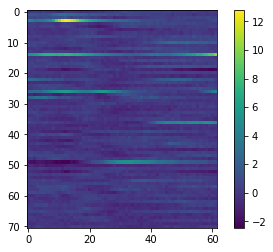

In [1002]:
# find longest window between preStart and postDecision and set as length for all trials
max_window = int(np.max(window_length))
#max_window = int(np.ceil(np.mean(window_length)+3*std_window_length))
aligned_start = np.zeros((nTrials, max_window, nNeurons))

#long_trials = np.where(np.array(window_length)>(np.mean(window_length)+3*std_window_length))[0]
#good_trials = [x for x in range(0, nTrials) if x not in long_trials]

# create array containing segment of raw trace for each neuron for each trial 
# aligned to center poke
count = 0
for iNeuron in good_neurons:
    for iTrial in range(0,nTrials):
        aligned_start[iTrial,0:max_window, count] = neuron.C_raw[iNeuron, int(preStart.iloc[iTrial]):(int(preStart.iloc[iTrial])+max_window)]
    count = count+1

#plt.imshow(aligned_start[:,:,0]), plt.colorbar()

# take mean of fluorescent traces across all trials for each neuron, then normalize for each neuron
mean_across_trials = np.mean(aligned_start, axis=0)
norm_mean = np.zeros((mean_across_trials.shape[0], nNeurons))

for iNeuron in range(0,nNeurons):
    norm_mean[:,iNeuron] = (mean_across_trials[:,iNeuron] - np.min(mean_across_trials, axis=0)[iNeuron])/(np.max(mean_across_trials,axis=0)[iNeuron] - np.min(mean_across_trials,axis=0)[iNeuron])
    #norm_mean = [x-np.min(mean_across_trials, axis=0) for x in mean_across_trials]/(np.max(mean_across_trials,axis=0) - np.min(mean_across_trials,axis=0))
plt.imshow(np.transpose(mean_across_trials)), plt.colorbar()

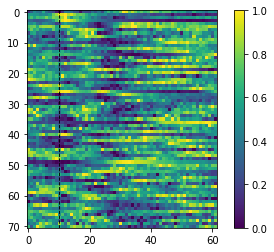

In [1003]:
# heatmap for all neurons (each neuron represented by avg fluorescence across all trials)
plt.imshow(np.transpose(norm_mean)), plt.colorbar()
plt.axvline(x=10, color='k', linestyle = '--', linewidth=.9)

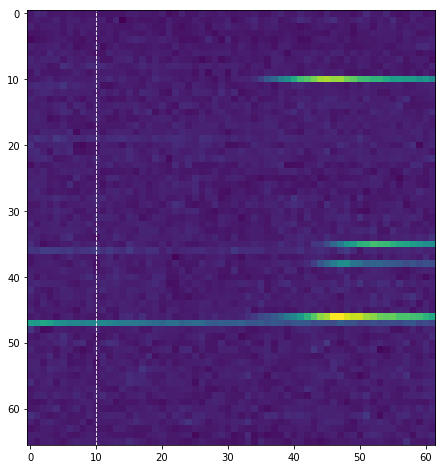

In [1004]:
# heatmap for calcium traces of a single neuron across all trials
# white dashed line for center poke time
# white vertical lines for decision poke time -- need something more subtle
sample_neuron = 10

plt.figure(figsize=(8,8))
plt.imshow(aligned_start[:,:,sample_neuron])
plt.axvline(x=10, color='white', linestyle = '--', linewidth=.9)
#plt.scatter(trialDecision-preStart,range(0,nTrials), color='white', marker = '|', s=8)

In [989]:
# save array of normalized means for one condition before re-running on second condition
norm_mean_1 = norm_mean

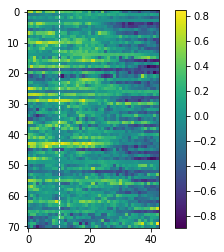

In [1005]:
# plot the difference between two conditions
plt.imshow(np.transpose(norm_mean_1[0:43] - norm_mean[0:43])), plt.colorbar()
plt.axvline(x=10, color='white', linestyle = '--', linewidth=.9)